In [99]:
import numpy as np
import matplotlib.pyplot as plt


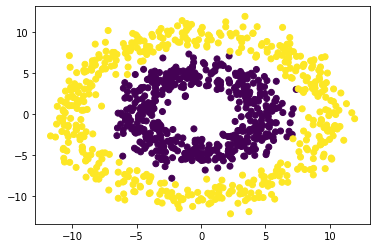

In [100]:
N = 1000
D = 2

R_inner = 5
R_outer = 10

R1 = np.random.randn(int(N/2)) + R_inner
theta = 2*np.pi*np.random.random(int(N/2))
X_inner = np.concatenate([[R1*np.cos(theta)],[R1*np.sin(theta)]]).T

R2 = np.random.randn(int(N/2)) + R_outer
theta = 2*np.pi*np.random.random(int(N/2))
X_outer = np.concatenate([[R2*np.cos(theta)],[R2*np.sin(theta)]]).T

X = np.concatenate([X_inner,X_outer])
T = np.array([0]*(int(N/2)) + [1]*(int(N/2)))

plt.scatter(X[:,0],X[:,1],c=T)
plt.show()

In [101]:
ones = np.array([[1]*N]).T

r = np.zeros((N,1))

for i in range(N):
    r[i] = np.sqrt(X[i,:].dot(X[i,:]))

Xb = np.concatenate((ones,r,X),axis=1)

w  = np.random.rand(D+2)
learning_rate = 0.001

In [102]:
# calculate the cross-entropy error

def cross_entropy(T,Y):
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        if T[i] == 0:
            E -= np.log(1-Y[i])
    return E    

In [103]:
#define sigmoid function

def sigmoid(z):
    return 1/(1+np.exp(-z))

In [104]:
# calculate probability
Y = sigmoid(Xb.dot(w))


error = []
for i in range(5000):
    e = cross_entropy(T,Y)
    error.append(e)
    if i % 1000 == 0:
        print(e)

    w += learning_rate*(np.dot((T-Y).T,Xb) - 0.01*w)

    Y = sigmoid(Xb.dot(w))


1409.3341987770752
30.020982383323368
25.158849335342754
22.5662726127384
20.918394461550566


Text(0.5, 1.0, 'cross-entropy')

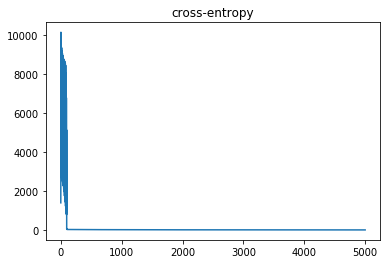

In [105]:
plt.plot(error)
plt.title("cross-entropy")

In [106]:
print("Final W: ",w)
print("Final classification rate: ", 1 - np.abs(T - np.round(Y)).sum()/N)

Final W:  [-2.29555543e+01  3.01616543e+00  8.83921590e-04  4.76394462e-02]
Final classification rate:  0.996
